<a href="https://colab.research.google.com/github/NDsasuke/OPTIMIZING-E-COMMERCE-KEYWORD-ANALYSIS-A-STUDY-ON-EFFECTIVE-PRODUCT-TITLE-RECOMMENDATIONS/blob/main/Model3_with_tuner_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Import and remove unwanted columns and null records

In [1]:
!wget https://jmcauley.ucsd.edu/data/amazon_v2/metaFiles2/meta_Industrial_and_Scientific.json.gz --no-check-certificate -O input.gz

--2023-06-20 02:13:03--  https://jmcauley.ucsd.edu/data/amazon_v2/metaFiles2/meta_Industrial_and_Scientific.json.gz
Resolving jmcauley.ucsd.edu (jmcauley.ucsd.edu)... 137.110.160.73
Connecting to jmcauley.ucsd.edu (jmcauley.ucsd.edu)|137.110.160.73|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 83600786 (80M) [application/x-gzip]
Saving to: ‘input.gz’

input.gz            100%[===================>]  79.73M  47.1MB/s    in 1.7s    

2023-06-20 02:13:05 (47.1 MB/s) - ‘input.gz’ saved [83600786/83600786]



In [2]:
import json
import gzip

data = []
with gzip.open('input.gz', 'r') as f:
    for l in f:
        data.append(json.loads(l.strip()))

titles = data[0].keys()
print(list(titles))


['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2', 'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item', 'date', 'price', 'asin', 'imageURL', 'imageURLHighRes']


In [3]:
import pandas as pd

new_data = []

for record in data:
    new_record = { 'date': record['date'],'title': record['title']}
    new_data.append(new_record)

df = pd.DataFrame(new_data)

print(df.head())


                date                                              title
0                          Turning Technologies Response Card (RCRF-03)
1                     R-Cat 692782109 EKG Badge with Arrhythmia Pock...
2     August 7, 2007  Anatomical Chart Company's Illustrated Pocket ...
3  February 26, 2009   Joints of the Lower Extremities Anatomical Chart
4                          Turning Technologies ResponseCard XR RCXR-01


In [4]:
# Print the number of records in the filtered dataset
print(f"There are {len(df)} records in the filtered dataset.")

There are 167442 records in the filtered dataset.


In [5]:
# Convert "date" column to datetime data type, ignoring any non-date values
df["date"] = pd.to_datetime(df["date"], errors="coerce")

In [6]:
# Drop rows with null values in the "date" column
df.dropna(subset=["date"], inplace=True)

In [7]:
# Print the number of records in the filtered dataset
print(f"There are {len(df)} records in the filtered dataset.")

There are 44278 records in the filtered dataset.


In [8]:
df.head()

,date,title
2,2007-08-07,Anatomical Chart Company's Illustrated Pocket ...
3,2009-02-26,Joints of the Lower Extremities Anatomical Chart
7,2006-09-06,The Male Reproductive System Anatomical Chart
9,2005-08-04,Hand and Wrist Anatomical Chart
10,2008-01-21,The Spinal Nerves Anatomical Chart


Preprocessing

In [9]:
import nltk
from nltk.corpus import stopwords
import pandas as pd

# Download the necessary resources for tokenization and stop words
nltk.download('punkt')
nltk.download('stopwords')

# Define the tokenize_title function
def tokenize_title(title):
    tokens = nltk.word_tokenize(title)
    return tokens

# Tokenize the titles in the dataset
df['tokens'] = df['title'].apply(tokenize_title)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
# Load the stop words for English
stop_words = set(stopwords.words('english'))
stop_words.update([';', '&', 'quot', 'x', '(', ')', '-',',','.'])

# Tokenize the text in the 'tokens' column and remove stop words
keywords = []
for tokens in df['tokens']:
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words and token.isalpha()]
    keywords.append(filtered_tokens)

# Add the 'keywords' column to the dataframe
df['keywords'] = keywords

In [11]:
df.head()

,date,title,tokens,keywords
2,2007-08-07,Anatomical Chart Company's Illustrated Pocket ...,"[Anatomical, Chart, Company, 's, Illustrated, ...","[Anatomical, Chart, Company, Illustrated, Pock..."
3,2009-02-26,Joints of the Lower Extremities Anatomical Chart,"[Joints, of, the, Lower, Extremities, Anatomic...","[Joints, Lower, Extremities, Anatomical, Chart]"
7,2006-09-06,The Male Reproductive System Anatomical Chart,"[The, Male, Reproductive, System, Anatomical, ...","[Male, Reproductive, System, Anatomical, Chart]"
9,2005-08-04,Hand and Wrist Anatomical Chart,"[Hand, and, Wrist, Anatomical, Chart]","[Hand, Wrist, Anatomical, Chart]"
10,2008-01-21,The Spinal Nerves Anatomical Chart,"[The, Spinal, Nerves, Anatomical, Chart]","[Spinal, Nerves, Anatomical, Chart]"


In [12]:
# Drop the 'Keywords' column
df = df.drop('title', axis=1)
df = df.drop('tokens', axis=1)

Analyzing

In [13]:
# Count the frequency of each keyword in the dataset
keyword_counts = {}
for tokens in df['keywords']:
    for token in tokens:
            if token in keyword_counts:
                keyword_counts[token] += 1
            else:
                keyword_counts[token] = 1

# Sort the keywords by frequency in descending order
sorted_keywords = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)

# Display the top 10 keywords by frequency
for keyword, count in sorted_keywords[:10]:
    print(keyword, count)

Steel 4021
Pack 3191
Screw 2929
Stainless 2578
Head 2572
Black 2320
Screws 2108
amp 1959
Tape 1898
Hillman 1761


In [14]:
df.head()

,date,keywords
2,2007-08-07,"[Anatomical, Chart, Company, Illustrated, Pock..."
3,2009-02-26,"[Joints, Lower, Extremities, Anatomical, Chart]"
7,2006-09-06,"[Male, Reproductive, System, Anatomical, Chart]"
9,2005-08-04,"[Hand, Wrist, Anatomical, Chart]"
10,2008-01-21,"[Spinal, Nerves, Anatomical, Chart]"


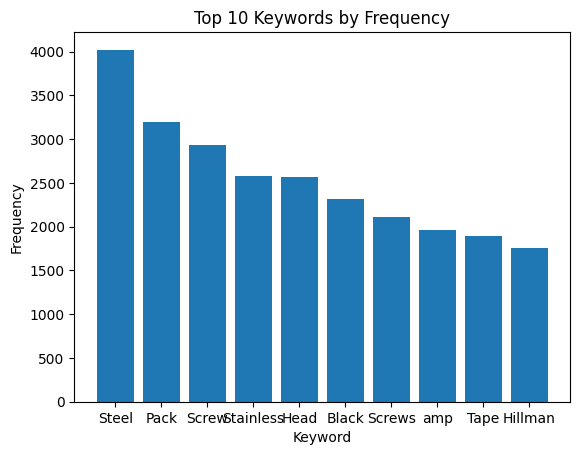

In [15]:
import matplotlib.pyplot as plt

# Display a bar chart of the top 10 keywords by frequency
top_keywords = dict(sorted_keywords[:10])
plt.bar(top_keywords.keys(), top_keywords.values())
plt.title('Top 10 Keywords by Frequency')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.show()

<ipython-input-16-824a703c5e72>:24: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  keyword_matrix[top_keywords].plot(figsize=(10,6))


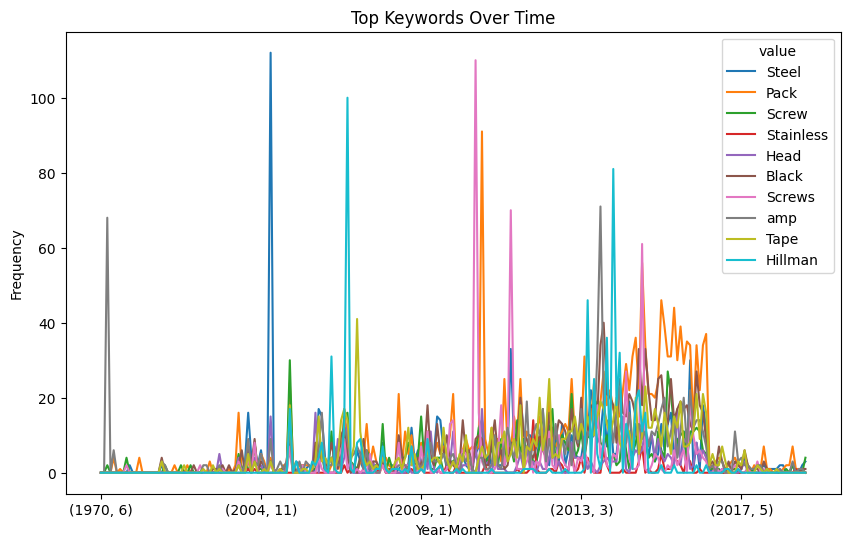

In [16]:
# Convert "date" column to datetime data type, ignoring any non-date values
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Remove rows with missing values in the "date" column
df.dropna(subset=["date"], inplace=True)

# Extract the month and year from the "date" column
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year

# Extract the keywords for each row
def extract_keywords(tokens):
    return [token for token in tokens if token in top_keywords]

df['value'] = df['keywords'].apply(extract_keywords)

# Group the data by month, year, and keyword, and count the number of occurrences
monthly_counts = df.groupby([df['month'], df['year'], df['value'].apply(lambda x: ', '.join(x))]).size().reset_index(name='count')

# Pivot the data to create a matrix with years and months as rows and keywords as columns
keyword_matrix = monthly_counts.pivot(index=['year', 'month'], columns='value', values='count').fillna(0)

# Create a time series plot of the top keywords
keyword_matrix[top_keywords].plot(figsize=(10,6))
plt.title('Top Keywords Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.show()



<ipython-input-17-d1b62c7fe73a>:8: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  keyword_matrix[top_keywords].plot(figsize=(10,6))


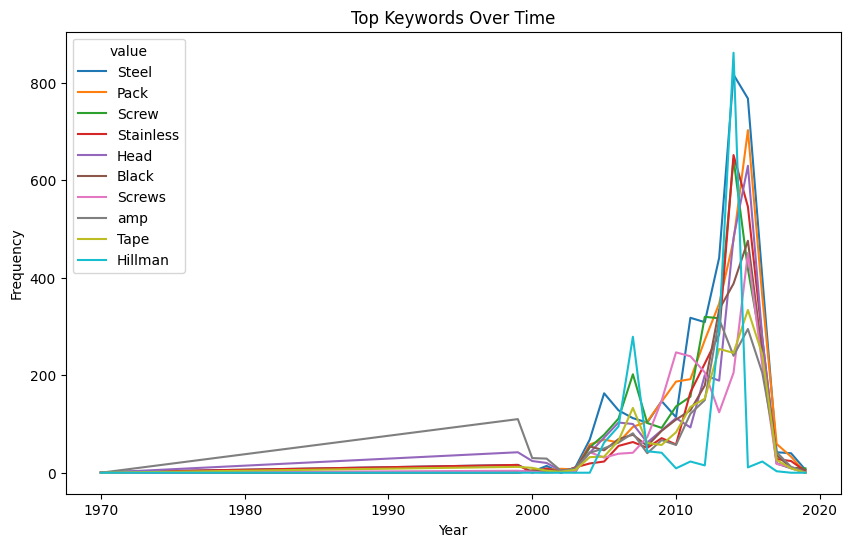

In [17]:
# Group the data by year and keyword, and count the number of occurrences
yearly_counts = df.explode('value').groupby([df['date'].dt.year, 'value']).size().reset_index(name='count')

# Pivot the data to create a matrix with years as rows and keywords as columns
keyword_matrix = yearly_counts.pivot(index='date', columns='value', values='count').fillna(0)

# Create a time series plot of the top keywords
keyword_matrix[top_keywords].plot(figsize=(10,6))
plt.title('Top Keywords Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

df = df.drop('value', axis=1)

In [18]:
df.head()

,date,keywords,month,year
2,2007-08-07,"[Anatomical, Chart, Company, Illustrated, Pock...",8,2007
3,2009-02-26,"[Joints, Lower, Extremities, Anatomical, Chart]",2,2009
7,2006-09-06,"[Male, Reproductive, System, Anatomical, Chart]",9,2006
9,2005-08-04,"[Hand, Wrist, Anatomical, Chart]",8,2005
10,2008-01-21,"[Spinal, Nerves, Anatomical, Chart]",1,2008


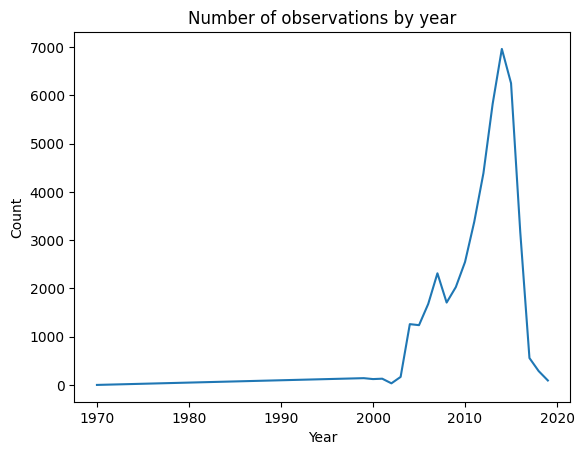

In [19]:
# Count the number of observations per year
counts_by_year = df['year'].value_counts().sort_index()

# Create a line plot of the counts by year
plt.plot(counts_by_year.index, counts_by_year.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of observations by year')
plt.show()

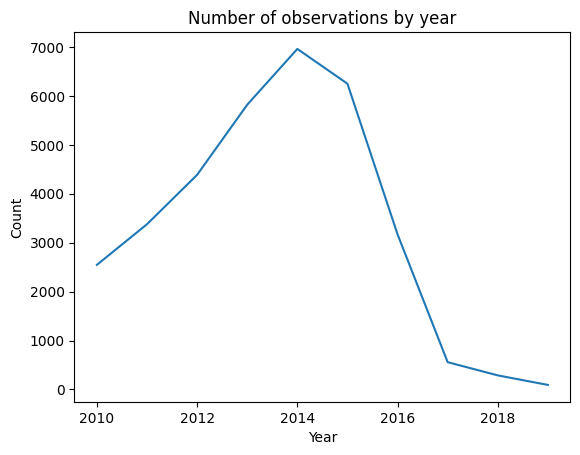

In [20]:
# Filter the rows to keep only those with dates in or after 2010
df = df.loc[df['date'].dt.year >= 2010]

# Count the number of observations per year
counts_by_year = df['year'].value_counts().sort_index()

# Create a line plot of the counts by year
plt.plot(counts_by_year.index, counts_by_year.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of observations by year')
plt.show()

Procces for model input

In [21]:
# Split the data into training and testing sets based on the year
train_df = df.loc[df['date'].dt.year < 2017]
test_df = df.loc[df['date'].dt.year >= 2017]

In [22]:
train_df.head()

,date,keywords,month,year
20,2014-07-27,"[UHU, Contact, Gel, Super, Glue, Adhesive]",7,2014
46,2010-02-17,"[Delta, Charcoal, Filter]",2,2010
166,2010-07-24,"[Silicone, Bulb, Gasket, Self, Adhesive, Weath...",7,2010
238,2010-01-20,"[General, Tools, Inside, Calipers, Inch, Jaw, ...",1,2010
339,2015-02-19,"[Shepherd, Hardware, Hooded, Ball, Stem, Caste...",2,2015


In [23]:
from collections import Counter

# Create an empty list to store the target variable
target = []

# Iterate through each group of year and month
for (year, month), group in train_df.groupby(['year', 'month']):
    # Count the frequency of each keyword in the group
    counter = Counter(keyword for keywords in group['keywords'] for keyword in keywords)
    # Select the 10 most common keywords as the target variable
    if len(counter) > 0:
        target_keywords = [t[0] for t in counter.most_common(10)]
    else:
        target_keywords = None
    # Add the target variable to the list
    target.append((year, month, target_keywords))

# Convert the list to a pandas DataFrame
target = pd.DataFrame(target, columns=['year', 'month', 'target'])

# Preview the target variable
print(target.head())

# Merge the target variable with the original dataset based on the year and month columns
train_df = pd.merge(train_df, target, on=['year', 'month'])

   year  month                                             target
0  2010      1  [Steelex, Insert, Tool, Sign, Plastic, Cylinde...
1  2010      2  [Mat, Width, Screws, Length, Floor, Black, Mat...
2  2010      3  [Screw, Tape, Screws, Hardware, Pack, Inch, Bo...
3  2010      4  [Screws, per, Star, Screw, Gauge, amp, Ring, D...
4  2010      5  [Tradespro, Assortment, Pack, Insulated, Gauge...


First model

In [24]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2023-06-20 02:13:39--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-06-20 02:13:39--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-06-20 02:13:39--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [25]:
# load the meta data

import subprocess
import json

# Extract the compressed file using 7zip
subprocess.run(['7z', 'e', '/content/glove.6B.zip'])

CompletedProcess(args=['7z', 'e', '/content/glove.6B.zip'], returncode=0)

In [26]:
train_df.head()

,date,keywords,month,year,target
0,2014-07-27,"[UHU, Contact, Gel, Super, Glue, Adhesive]",7,2014,"[Valve, Ball, Pack, White, Lead, Free, HiLetgo..."
1,2014-07-03,"[Steelex, Nylon, Furniture, Caster, Swivel]",7,2014,"[Valve, Ball, Pack, White, Lead, Free, HiLetgo..."
2,2014-07-03,"[Steelex, Nylon, Furniture, Caster, Swivel]",7,2014,"[Valve, Ball, Pack, White, Lead, Free, HiLetgo..."
3,2014-07-10,"[Zona, Rotating, Bur, Holder, Shank, Burs, Dee...",7,2014,"[Valve, Ball, Pack, White, Lead, Free, HiLetgo..."
4,2014-07-24,"[Asphalt, Repair, lb]",7,2014,"[Valve, Ball, Pack, White, Lead, Free, HiLetgo..."


In [27]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.6 MB/s eta 0:00:00


In [28]:
from keras.layers import Dropout
from keras.regularizers import l1, l2, l1_l2
from keras.models import Model
from keras.layers import Embedding, LSTM, Dense, Input, Concatenate, TimeDistributed, RepeatVector
from keras.optimizers import Adam
import pandas as pd
import numpy as np
import keras_tuner as kt
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Assuming 'year' column in your DataFrame
train1_df = train_df[train_df['year'] < 2015]
test1_df = train_df[train_df['year'] >= 2015]

# Tokenize the keywords
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train1_df['keywords'])
sequences_keywords_train = tokenizer.texts_to_sequences(train1_df['keywords'])
sequences_keywords_test = tokenizer.texts_to_sequences(test1_df['keywords'])

# Tokenize the targets
tokenizer_target = Tokenizer()
tokenizer_target.fit_on_texts(train1_df['target'])
sequences_target_train = tokenizer_target.texts_to_sequences(train1_df['target'])
sequences_target_test = tokenizer_target.texts_to_sequences(test1_df['target'])

# One-hot encode the month column
mon_train = to_categorical(train1_df['month'] - 1)  # subtract 1 to get 0-indexed labels
mon_test = to_categorical(test1_df['month'] - 1)  # subtract 1 to get 0-indexed labels

# Pad the sequences to a fixed length
max_length = 100
padded_sequences_keywords_train = pad_sequences(sequences_keywords_train, maxlen=max_length)
padded_sequences_keywords_test = pad_sequences(sequences_keywords_test, maxlen=max_length)
padded_sequences_target_train = pad_sequences(sequences_target_train, maxlen=max_length)
padded_sequences_target_test = pad_sequences(sequences_target_test, maxlen=max_length)

# Load pre-trained embeddings
embeddings_index = {}
with open('glove.6B.100d.txt', 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create an embedding matrix for the words in the vocabulary
num_words = len(tokenizer.word_index) + 1
embedding_dim = 100
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# padded sequnce as X
X_train = padded_sequences_keywords_train
X_test = padded_sequences_keywords_test

# Use only the target sequences for y (not the month)
y_train = padded_sequences_target_train
y_test = padded_sequences_target_test

def build_model(hp):
    # Define the two inputs
    input_keywords = Input(shape=(max_length,), name='input_keywords')
    input_month = Input(shape=(12,), name='input_mon')

    # Embedding layer for keywords
    embedding_layer = Embedding(num_words, embedding_dim, weights=[embedding_matrix],
                                input_length=max_length, trainable=False)(input_keywords)

    # Tunable number of LSTM layers
    for i in range(hp.Int('num_lstm_layers', 1, 3)):
        if i == 0:
            lstm_layer = LSTM(hp.Int(f'lstm_units_{i}', min_value=32, max_value=512, step=32),
                              return_sequences=True)(embedding_layer)
        else:
            lstm_layer = LSTM(hp.Int(f'lstm_units_{i}', min_value=32, max_value=512, step=32),
                              return_sequences=True)(lstm_layer)

    # Repeat the month vector to match the sequence length
    repeat_vector = RepeatVector(max_length)(input_month)

    # Concatenate the output of LSTM layer with the month input
    concat_layer = Concatenate(axis=-1)([lstm_layer, repeat_vector])

    # Tunable number of Dense layers
    dense_layer = concat_layer
    for i in range(hp.Int('num_dense_layers', 1, 3)):
        dense_layer = TimeDistributed(Dense(hp.Int(f'dense_units_{i}', min_value=32, max_value=512, step=32),
                                            activation=hp.Choice('dense_activation', values=['relu', 'tanh', 'sigmoid']),
                                            kernel_regularizer=l1_l2(l1=hp.Float('l1_reg', 0, 0.1, step=0.01),
                                                                     l2=hp.Float('l2_reg', 0, 0.1, step=0.01))))(dense_layer)
        dense_layer = Dropout(hp.Float('dropout', 0, 0.5, step=0.1))(dense_layer)

    # Final output layer
    output = TimeDistributed(Dense(num_words, activation='softmax'))(dense_layer)

    # Create the model
    model = Model(inputs=[input_keywords, input_month], outputs=output)

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  metrics=['accuracy'])

    return model

In [ ]:
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     directory='my_dir',
                     project_name='intro_to_kt')

# Split the training and test data into keywords and month parts
X_train_keywords = X_train
X_train_month = mon_train
X_test_keywords = X_test
X_test_month = mon_test

# Remove the month from the targets
y_train = y_train
y_test = y_test

# Reshape the targets to be 3D
y_train = np.expand_dims(y_train, -1)
y_test = np.expand_dims(y_test, -1)

# Start the search for the best hyperparameters
tuner.search([X_train_keywords, X_train_month], y_train,
             epochs=5,
             batch_size=32,  # static batch size
             validation_data=([X_test_keywords, X_test_month], y_test))

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"The optimal number of units in the first LSTM-connected layer is {best_hps.get('lstm_units_0')} ")
print(f"The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}")
print(f"The optimal activation function is {best_hps.get('dense_activation')}")
print(f"The optimal number of LSTM layers is {best_hps.get('num_lstm_layers')}")
print(f"The optimal number of Dense layers is {best_hps.get('num_dense_layers')}")

# Re-build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
2                 |2                 |num_lstm_layers
160               |160               |lstm_units_0
1                 |1                 |num_dense_layers
448               |448               |dense_units_0
relu              |relu              |dense_activation
0.06              |0.06              |l1_reg
0.02              |0.02              |l2_reg
0.2               |0.2               |dropout
0.0001            |0.0001            |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
646/722 [=========================>....] - ETA: 5s - loss: 40.2533 - accuracy: 0.8467

In [ ]:
# Get all trials
all_trials = tuner.oracle.trials

# Print each trial's hyperparameters and score
for trial_id, trial in all_trials.items():
    print(f'Trial {trial_id}:\n Hyperparameters: {trial.hyperparameters.values}\n Final Score: {trial.score}\n\n')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract all trials from the tuner
all_trials = tuner.oracle.trials

# Initialize empty lists to hold values
lstm_units_0_values = []
learning_rate_values = []
dense_activation_values = []
num_lstm_layers_values = []
num_dense_layers_values = []

# Extract the hyperparameter values from each trial
for trial_id, trial in all_trials.items():
    hps = trial.hyperparameters.values
    lstm_units_0_values.append(hps['lstm_units_0'])
    learning_rate_values.append(hps['learning_rate'])
    dense_activation_values.append(hps['dense_activation'])
    num_lstm_layers_values.append(hps['num_lstm_layers'])
    num_dense_layers_values.append(hps['num_dense_layers'])

# Create subplots
fig, ax = plt.subplots(5, 1, figsize=(12, 24))

# Plot the lstm_units_0 values
ax[0].plot(lstm_units_0_values)
ax[0].set_title('Changes in lstm_units_0 over trials')
ax[0].set_xlabel('Trial')
ax[0].set_ylabel('lstm_units_0')

# Plot the learning_rate values
ax[1].plot(learning_rate_values)
ax[1].set_title('Changes in learning_rate over trials')
ax[1].set_xlabel('Trial')
ax[1].set_ylabel('learning_rate')

# Plot the num_lstm_layers values
ax[2].plot(num_lstm_layers_values)
ax[2].set_title('Changes in num_lstm_layers over trials')
ax[2].set_xlabel('Trial')
ax[2].set_ylabel('num_lstm_layers')

# Plot the num_dense_layers values
ax[3].plot(num_dense_layers_values)
ax[3].set_title('Changes in num_dense_layers over trials')
ax[3].set_xlabel('Trial')
ax[3].set_ylabel('num_dense_layers')

plt.tight_layout()

# Pie chart for the dense_activation values
dense_activation_dict = {i: dense_activation_values.count(i) for i in dense_activation_values}
fig, ax = plt.subplots()
ax.pie(dense_activation_dict.values(), labels=dense_activation_dict.keys(), autopct='%1.1f%%')
ax.set_title('Distribution of dense_activation over trials')

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Sort trials by score
all_trials = tuner.oracle.trials
sorted_trials = sorted(all_trials.items(), key=lambda x: x[1].score)

# Get trial ids and scores
trial_ids = [x[0] for x in sorted_trials]
scores = [x[1].score for x in sorted_trials]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(trial_ids, scores, marker='o')
plt.xlabel('Trial ID')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Each Trial')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Get learning rates
learning_rates = [x[1].hyperparameters.values['learning_rate'] for x in sorted_trials]

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(learning_rates, scores)
plt.xscale('log')  # optional: if the learning rates vary over orders of magnitude
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different Learning Rates')
plt.show()


In [ ]:
from keras.callbacks import ModelCheckpoint

# Create a checkpoint callback
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=False,
                             save_weights_only=True,
                             mode='auto',
                             save_freq='epoch')

# Fit the model and save the training history
history = model.fit([X_train_keywords, X_train_month], y_train,
                    epochs=100,
                    validation_data=([X_test_keywords, X_test_month], y_test),
                    batch_size=32,  # set your batch size here
                    callbacks=[checkpoint])



model 1 evaluation

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate([X_test_keywords, X_test_month], y_test)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


In [ ]:
!pip install Levenshtein

In [ ]:
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu
import Levenshtein as lev

# Calculate and print BLEU score for some predictions
for i in range(5):
    prediction = model.predict([X_test_keywords[i:i+1], X_test_month[i:i+1]])
    predicted_sequence = np.argmax(prediction, axis=-1)
    print("Actual:", tokenizer_target.sequences_to_texts([np.squeeze(y_test[i])]))
    print("Predicted:", tokenizer_target.sequences_to_texts([np.squeeze(predicted_sequence)]))
    print("BLEU Score:", sentence_bleu([np.squeeze(y_test[i])], np.squeeze(predicted_sequence[0])))
    print("Edit Distance:", lev.distance(str(np.squeeze(y_test[i])), str(np.squeeze(predicted_sequence[0]))))
    print("\n")


In [ ]:
def remove_duplicates(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

# Calculate and print BLEU score for some predictions
for i in range(5):
    prediction = model.predict([X_test_keywords[i:i+1], X_test_month[i:i+1]])
    predicted_sequence = np.argmax(prediction, axis=-1)[0]  # Get the first sequence
    predicted_sequence_no_duplicates = remove_duplicates(predicted_sequence)  # Remove duplicates in the sequence
    print("Actual:", tokenizer_target.sequences_to_texts([np.squeeze(y_test[i])]))
    print("Predicted:", tokenizer_target.sequences_to_texts([predicted_sequence_no_duplicates]))
    print("BLEU Score:", sentence_bleu([np.squeeze(y_test[i])], predicted_sequence_no_duplicates))
    print("Edit Distance:", lev.distance(str(np.squeeze(y_test[i])), str(predicted_sequence_no_duplicates)))
    print("\n")

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
